# Física Aplicada à Computação (2024-25)

### Processamento de dados adquiridos por sensores IMU relativos à postura
João Silva - 24284@stu.ipbeja.pt / Instituto Politécnico de Beja

## Descrição
Este relatório visa a documentar o processo de aquisição e processamento de dados dos sensores de giroscópio, acelerómetro, magnetómetro, pressão barométrica, temperatura e
humidade relativa do arduino nano 33 ble sense rev2. \
Para fazer o processamento dos dados foram utilizadas diversas bibliotecas de Python como por exemplo as bibliotecas "Pandas" e "Numpy", para processar altos volumes de dados e também "Matplotlib" e "Seaborn" para fazer a visualização de dados por meio de gráficos.

Este relatório visa a documentar o processo de análise dos dados recolhidos por meio dos sensores IMU do Arduino Nano 33 BLE SENSE REV2. \
Para realizar este processamento foram utilizadas as bibliotecas: 
- Pandas: Análise dos dados recolhidos.
- Numpy:  Processamento de grandes volumes de dados
- Matplotlib: Criação de gráficos complexos para uma melhor análise dos dados.
- Seaborn: Biblioteca baseada em Matplotlib e utilizada para visualização de dados.

Com esta análise pretende-se avaliar os dados armazenados em um ficheiro .csv determinando se a postura ao longo da recolha dos dados é boa ou má. 

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tabulate import tabulate

## Análise dos dados em função do tempo

Após ser feita a recolha dos dados foi feita uma análise dos valores de "Tilt", nos eixos X e Y em função do Time.\
Utilizando o código abaixo, foi gerado um gráfico que mostra a variação dos ângulos de inclinação ao longo do tempo:

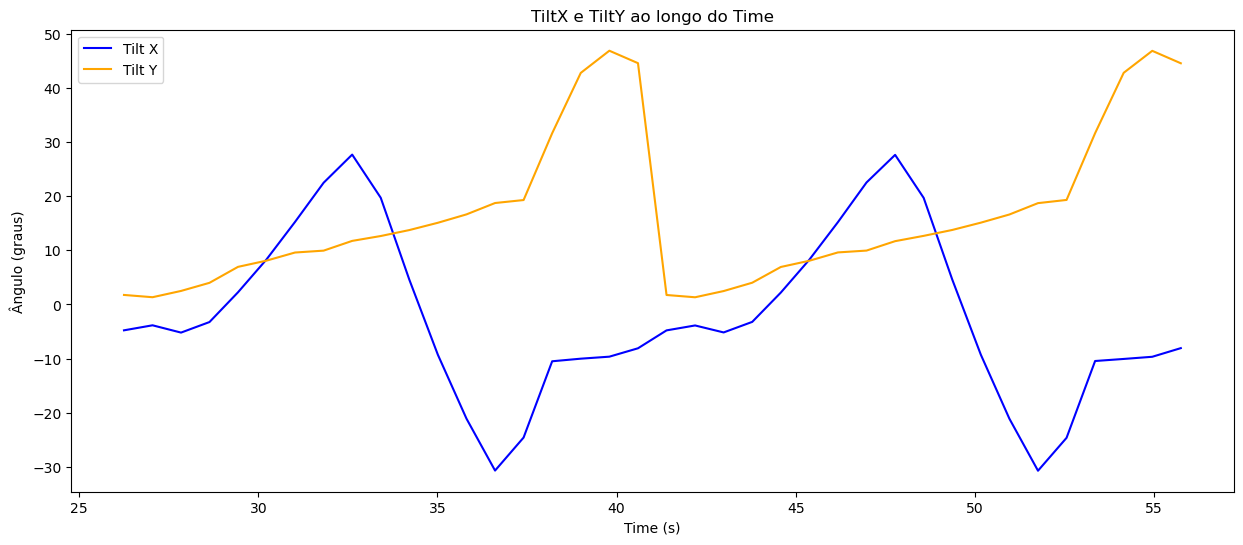

In [128]:
df = pd.read_csv('POSTURE.CSV')

plt.figure(figsize=(15, 6))
plt.plot(df["Time"], df["TiltX"], label="Tilt X", color='blue')
plt.plot(df["Time"], df["TiltY"], label="Tilt Y", color='orange')
plt.legend()
plt.title("TiltX e TiltY ao longo do Time")
plt.xlabel("Time (s)")
plt.ylabel("Ângulo (graus)")
plt.show()


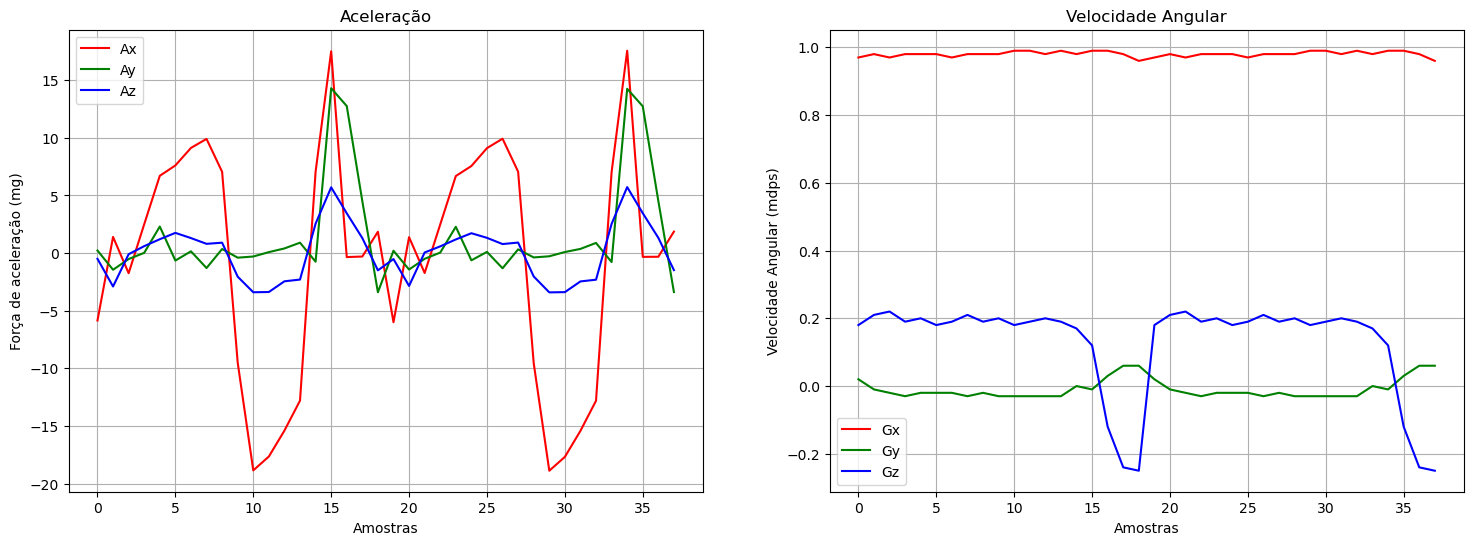

In [130]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(df['Ax'], label='Ax', color='r')
plt.plot(df['Ay'], label='Ay', color='g')
plt.plot(df['Az'], label='Az', color='b')
plt.title("Aceleração")
plt.xlabel("Amostras")
plt.ylabel("Força de aceleração (mg)")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(df['Gx'], label='Gx', color='r')
plt.plot(df['Gy'], label='Gy', color='g')
plt.plot(df['Gz'], label='Gz', color='b')
plt.title("Velocidade Angular")
plt.xlabel("Amostras")
plt.ylabel("Velocidade Angular (mdps)")
plt.legend()
plt.grid()

## Análise por correlação

A análise de correlação entre TiltX e TiltY verifica se há relação entre os eixos. Correlação próxima de 1 ou -1 indica dependência (aumentam juntos ou em direções opostas), enquanto 0 sugere independência. Um gráfico de dispersão visualiza essa relação, ajudando a identificar padrões ou comportamentos coordenados.

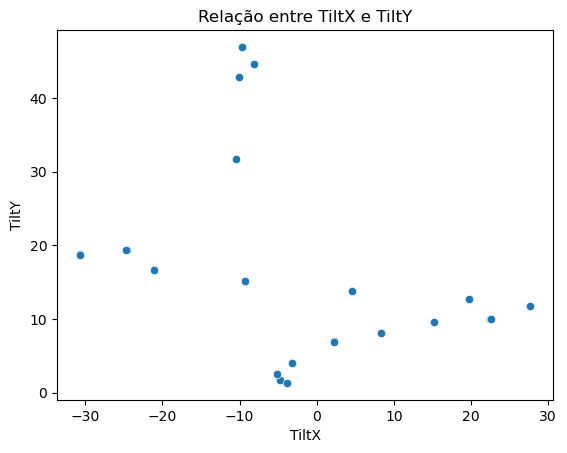

In [132]:
sns.scatterplot(data=df, x="TiltX", y="TiltY")
plt.title("Relação entre TiltX e TiltY")
plt.show()

Foi gerado um mapa de calor para analisar as correlações entre as variáveis dos dados recolhidos. Utilizou-se a biblioteca Seaborn para criar um heatmap com base na matriz de correlação calculada através do método corr() do DataFrame.
O gráfico, com uma paleta de cores "coolwarm", apresenta valores numéricos anotados (formatados com duas casas decimais) para cada correlação, permitindo uma leitura precisa.

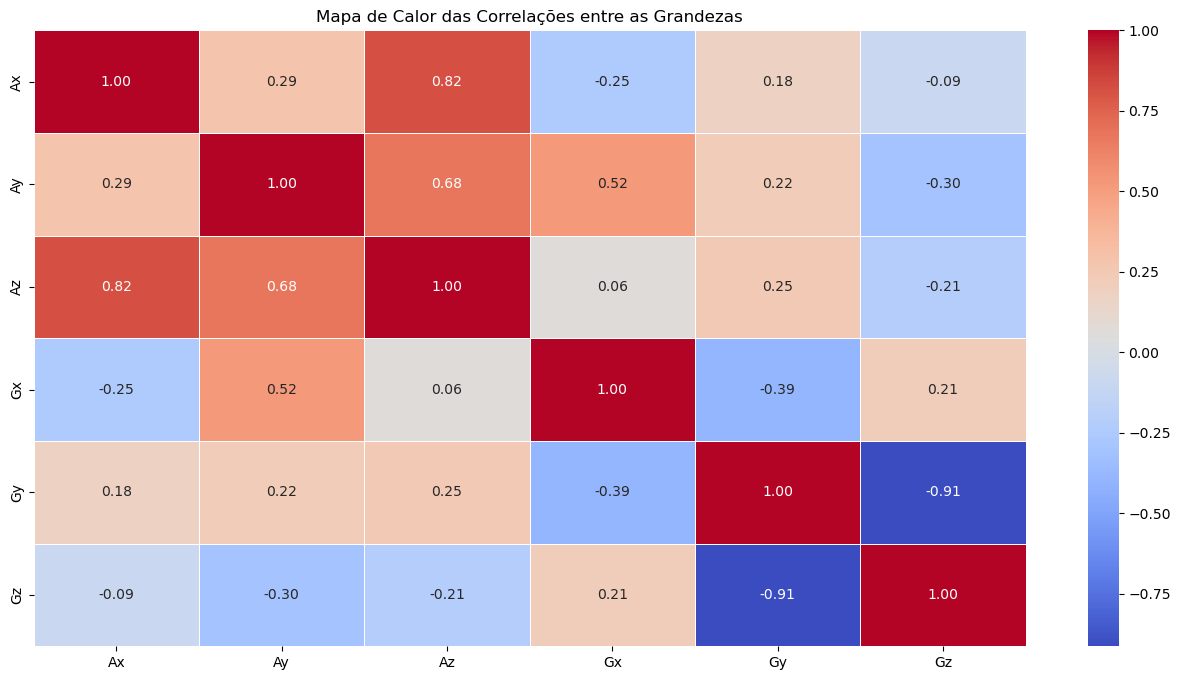

In [138]:
columns_to_exclude = ["Time", "TiltX", "TiltY", "OmegaTotal"]
df_filtered = df.drop(columns=columns_to_exclude, errors="ignore")

correlation_matrix = df_filtered.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor das Correlações entre as Grandezas")
plt.show()


## Estatística Descritiva

Após ser feita a recolha dos dados, foi feito uso da biblioteca 'Matplotlib' para criar gráficos que demonstram a variação dos eixos X,Y,Z dos sensores 'Giroscópio' e 'Acelerômetro'. 

In [140]:
columns_to_exclude = ["Time", "OmegaTotal"]
df_filtered = df.drop(columns=columns_to_exclude, errors="ignore")

stats = df_filtered.describe()

stats_table = pd.DataFrame({
    "Média": stats.loc["mean"],
    "Desvio Padrão": stats.loc["std"],
    "Mínimo": stats.loc["min"],
    "1º Quartil (Q1)": stats.loc["25%"],
    "Mediana (Q2)": stats.loc["50%"],
    "3º Quartil (Q3)": stats.loc["75%"],
    "Máximo": stats.loc["max"]
})

print(stats_table)

           Média  Desvio Padrão  Mínimo  1º Quartil (Q1)  Mediana (Q2)  \
Ax     -0.628684      10.113723  -18.88          -8.6250         1.390   
Ay      1.427895       4.476826   -3.40          -0.6025         0.085   
Az      0.055000       2.437245   -3.41          -2.2375         0.590   
Gx      0.980000       0.008054    0.96           0.9800         0.980   
Gy     -0.008421       0.029088   -0.03          -0.0300        -0.020   
Gz      0.126842       0.148217   -0.25           0.1725         0.190   
TiltX  -2.147105      15.470304  -30.73          -9.9325        -4.785   
TiltY  16.741053      14.228583    1.33           7.2325        12.665   

       3º Quartil (Q3)  Máximo  
Ax              7.0500   17.55  
Ay              0.7600   14.30  
Az              1.3150    5.72  
Gx              0.9875    0.99  
Gy             -0.0025    0.06  
Gz              0.2000    0.22  
TiltX           7.3650   27.70  
TiltY          19.1625   46.90  


## Histogramas de grandezas

Os dados dos sensores foram analisados através de histogramas que mostram a distribuição das grandezas medidas. Cada gráfico, gerado com a biblioteca Matplotlib, apresenta a frequência dos valores, eixos rotulados e grelhas para facilitar a interpretação. O layout foi otimizado para uma visualização clara e organizada.


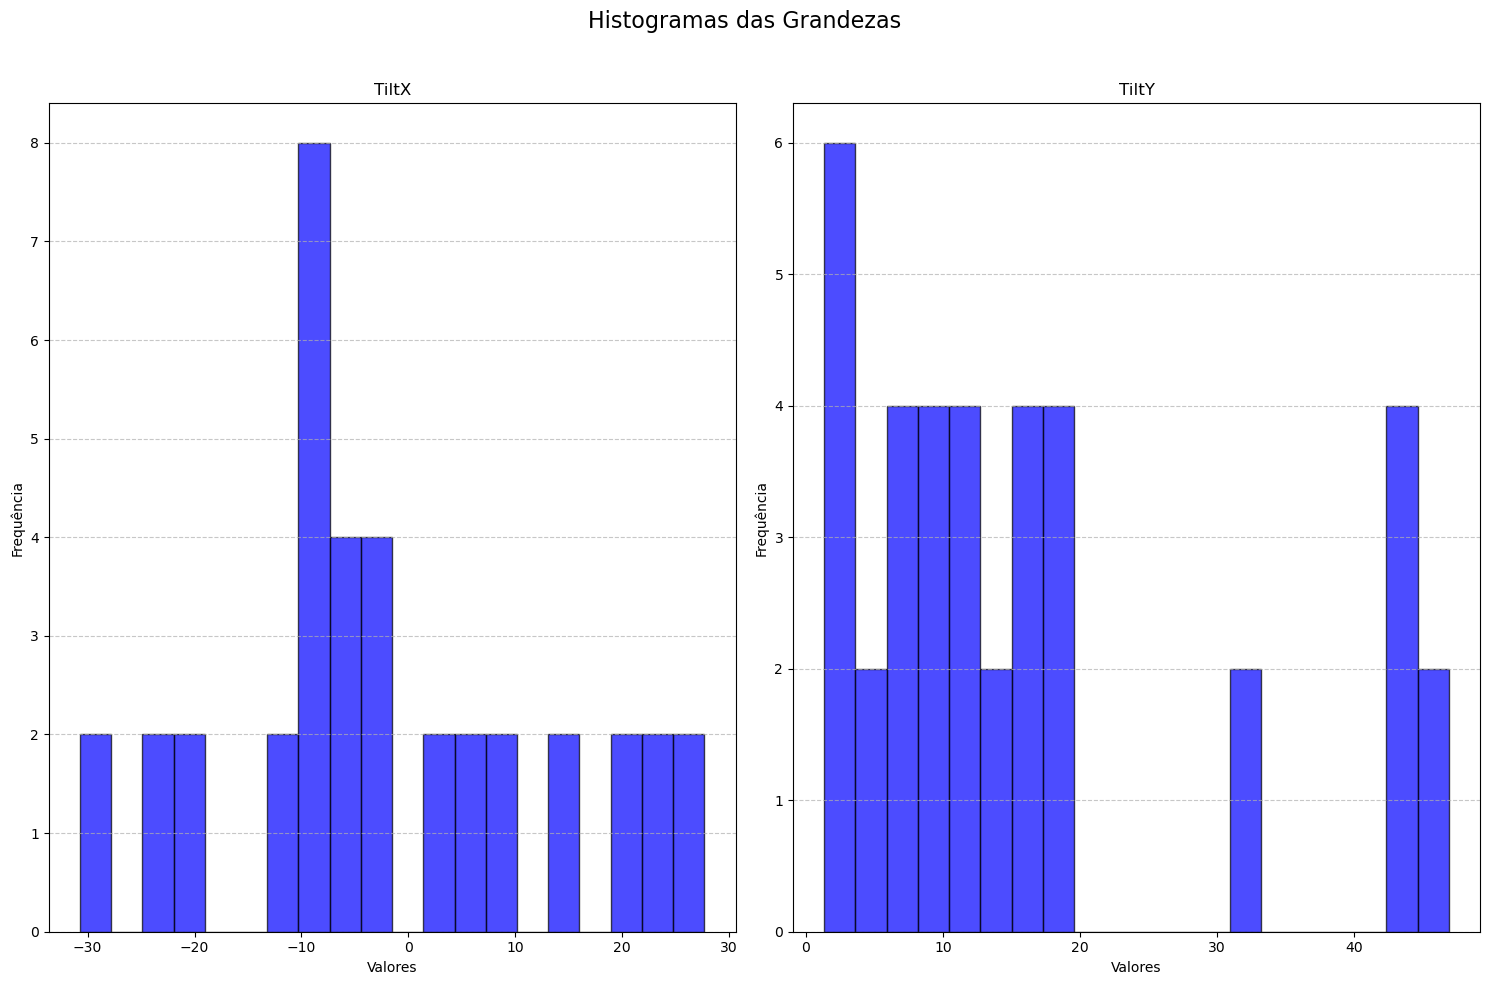

In [142]:
plt.figure(figsize=(15, 10))
plt.suptitle("Histogramas das Grandezas", fontsize=16)

plt.subplot(1, 2, 1)
plt.hist(df['TiltX'], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('TiltX')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.hist(df['TiltY'], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('TiltY')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Foi criada uma visualização com gráficos de dispersão e histogramas para explorar as relações entre as variáveis do conjunto de dados.
Utilizou-se a função pairplot da biblioteca Seaborn, que gera uma matriz de gráficos de dispersão (scatter plots) para todas as combinações de variáveis e histogramas nas diagonais principais.

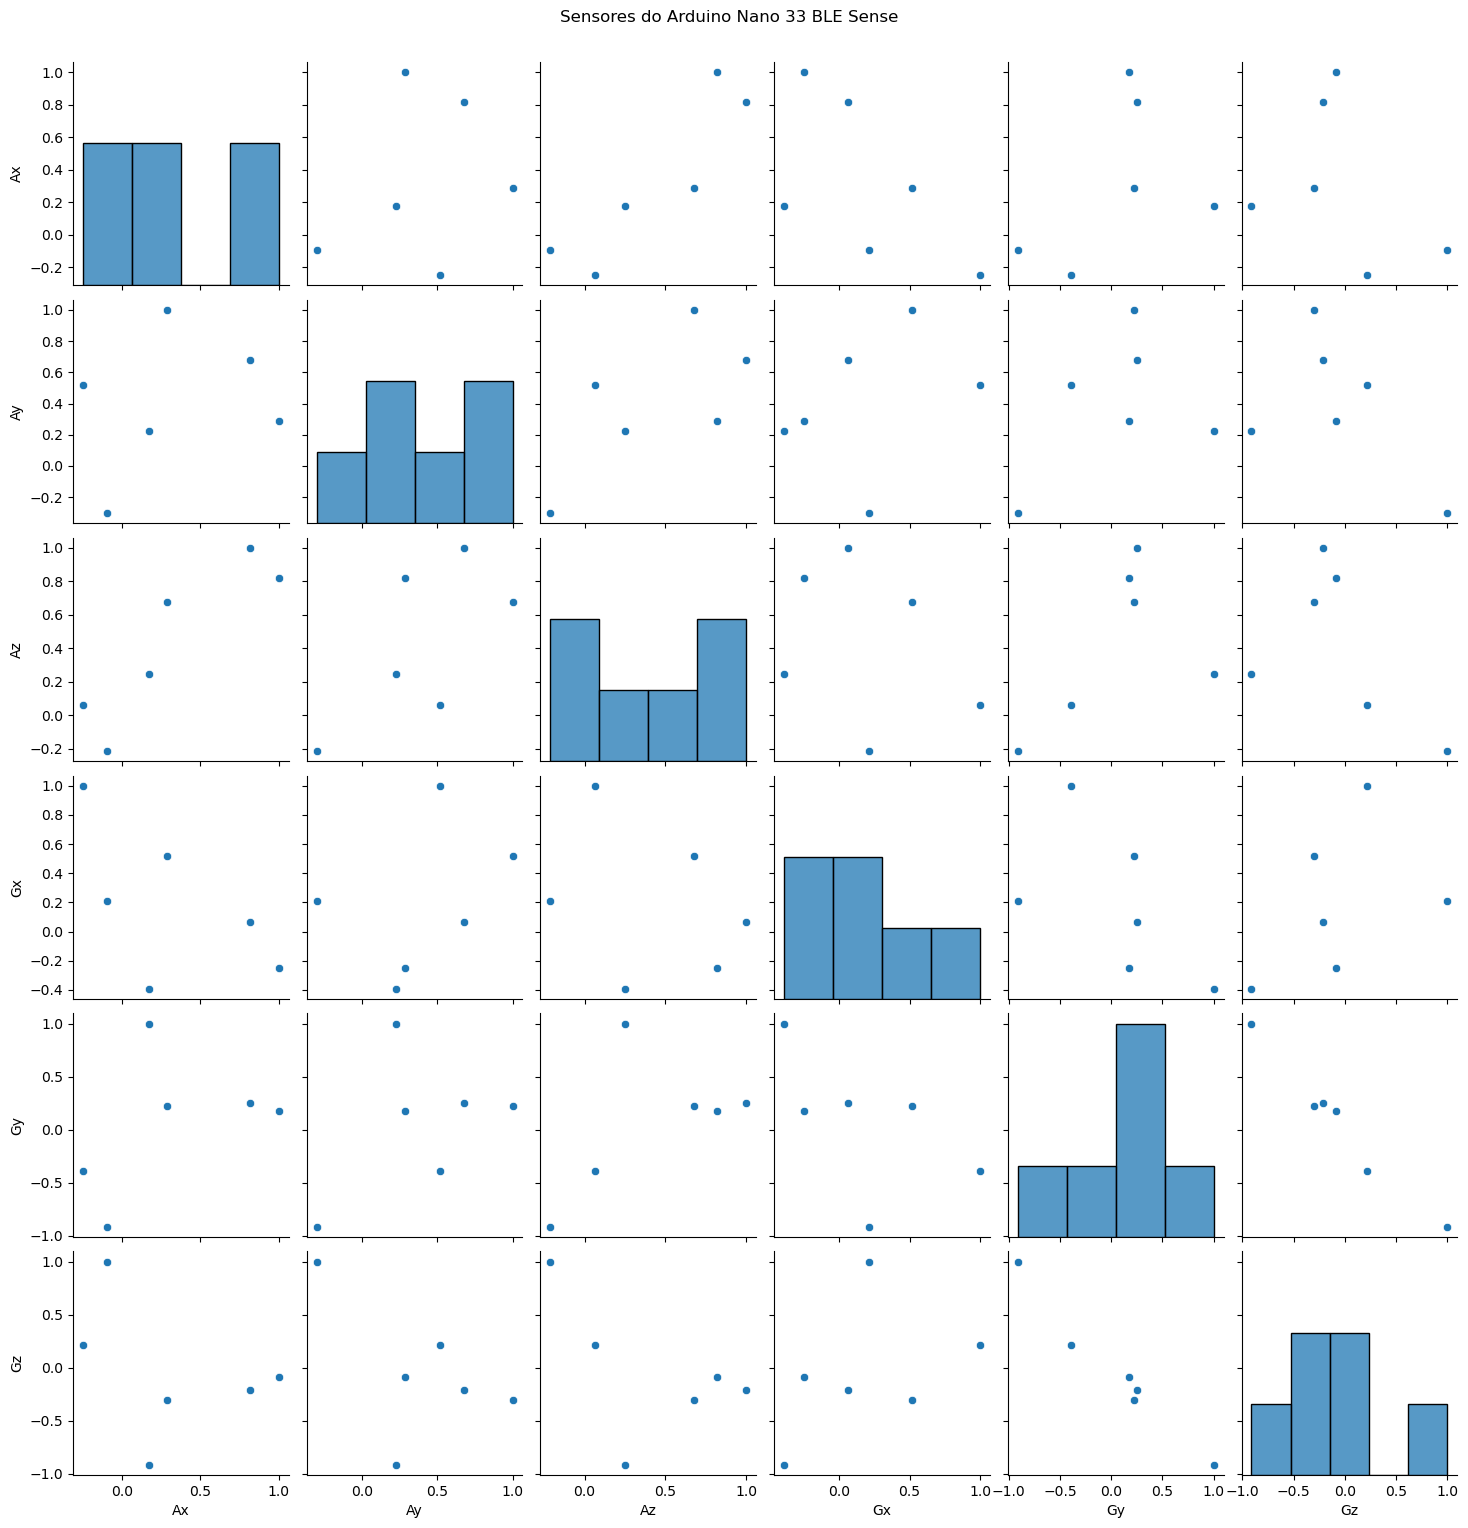

In [145]:
sns.pairplot(correlation_matrix, diag_kind='hist', markers='o')
plt.suptitle("Sensores do Arduino Nano 33 BLE Sense", y=1.02)
plt.show()

## Referências

[1] Documentação dos sensores IMU -  https://docs.arduino.cc/tutorials/nano-33-ble-sense-rev2/imu-gyroscope/ 
\
[2] Documentação da biblioteca BMI270_BMM150 - https://docs.arduino.cc/libraries/arduino_bmi270_bmm150/
\
[3] Tutorial de Python - https://www.w3schools.com/python/
\
[4] Recursos académicos sobre o Arduino, Física Aplicada à Computação, IPBeja - https://cms.ipbeja.pt/mod/folder/view.php?id=110848
\
[5] Recursos académicos sobre Python, Física Aplicada à Computação, IPBeja - https://cms.ipbeja.pt/mod/folder/view.php?id=213295